# 🧹 Чистка и подготовка данных отзывов 2GIS

В этом notebook мы:
1. Загружаем сырые данные
2. Проводим EDA (exploratory data analysis)
3. Чистим данные от шума, дубликатов, спама
4. Готовим данные для NLP анализа
5. Сохраняем очищенные данные

## 📦 Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import json
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Настройки визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Библиотеки загружены")

✅ Библиотеки загружены


## 📂 Загрузка данных

In [3]:
# Загрузка отзывов
reviews = pd.read_csv('../nlp_analysis/reviews_full.csv')
print(f"Загружено отзывов: {len(reviews):,}")

# Загрузка заведений
places = pd.read_csv('../nlp_analysis/places.csv')
print(f"Загружено заведений: {len(places):,}")

print("\n✅ Данные загружены")

Загружено отзывов: 73,767
Загружено заведений: 98

✅ Данные загружены


In [6]:
places

,firm_id,name,category,category_search,address,rating,reviews_count,reviews_collected,phone,url
0,70000001089786950,"Bauyrdaq Qazaq Fast-food, кафе",Быстрое питание,кафе,Не указан,4.8,1161,910,+7‒775‒139‒18‒00,https://2gis.kz/almaty/firm/70000001089786950
1,70000001028556245,"Центр Шашлыка, кафе",Кафе,кафе,Не указан,4.2,806,646,+7‒707‒018‒01‒87,https://2gis.kz/almaty/firm/70000001028556245
2,70000001082550767,"Baharat, чайхана",Кафе,кафе,Не указан,4.8,1725,1362,+7‒707‒535‒94‒36,https://2gis.kz/almaty/firm/70000001082550767
3,70000001101151848,"DOM HOGO, кафе",Кафе,кафе,Не указан,4.8,131,104,+7‒707‒382‒78‒17,https://2gis.kz/almaty/firm/70000001101151848
4,70000001062081597,"Bukhara.kz, кафе",Кафе,кафе,Не указан,4.5,678,492,+7‒700‒812‒70‒70,https://2gis.kz/almaty/firm/70000001062081597
...,...,...,...,...,...,...,...,...,...,...
93,70000001083456440,"Тәп-Тәтті, кондитерская-пекарня",Кондитерские изделия,пекарня,Не указан,4.7,93,80,+7‒776‒000‒45‒90,https://2gis.kz/almaty/firm/70000001083456440
94,70000001095717014,"Coffee Boom roasters and bakery, сеть кофеен",Кофейни,пекарня,Не указан,4.7,1061,947,+7‒700‒111‒99‒69,https://2gis.kz/almaty/firm/70000001095717014
95,70000001080319326,"DO.STAR specialty coffee, кофейня-кафе",Кофейни,пекарня,Не указан,4.8,310,261,+7‒707‒912‒35‒56,https://2gis.kz/almaty/firm/70000001080319326
96,70000001089490010,"Bella Ciao, итальянская траттория",Рестораны,пекарня,Не указан,4.5,1221,1065,+7‒708‒377‒37‒37,https://2gis.kz/almaty/firm/70000001089490010


## 🔍 Первичный анализ (EDA)

In [10]:
# Просмотр структуры
print("=" * 80)
print("СТРУКТУРА ДАННЫХ ОТЗЫВОВ")
print("=" * 80)
print(reviews.info())
print("\nПервые 5 строк:")
reviews.head()

СТРУКТУРА ДАННЫХ ОТЗЫВОВ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73767 entries, 0 to 73766
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   place_firm_id          73767 non-null  int64  
 1   place_name             73767 non-null  object 
 2   place_category         73767 non-null  object 
 3   place_category_search  73767 non-null  object 
 4   place_rating           73767 non-null  float64
 5   place_address          73767 non-null  object 
 6   author                 73765 non-null  object 
 7   author_reviews_count   73767 non-null  int64  
 8   rating                 73767 non-null  int64  
 9   text                   73767 non-null  object 
 10  text_length            73767 non-null  int64  
 11  date                   73767 non-null  object 
 12  is_verified            73767 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 6.8+ MB
None

Первые 5 

,place_firm_id,place_name,place_category,place_category_search,place_rating,place_address,author,author_reviews_count,rating,text,text_length,date,is_verified
0,70000001089786950,"Bauyrdaq Qazaq Fast-food, кафе",Быстрое питание,кафе,4.8,Не указан,Aizhan Umbetova,6,1,Өте нашар сервис! Отырғанымызға 40 минут болды...,193,2025-10-06,True
1,70000001089786950,"Bauyrdaq Qazaq Fast-food, кафе",Быстрое питание,кафе,4.8,Не указан,Джинлиров Рустам,6,1,Уже который раз заказываем. То еду не довезут....,122,2025-10-06,True
2,70000001089786950,"Bauyrdaq Qazaq Fast-food, кафе",Быстрое питание,кафе,4.8,Не указан,Исмаил Найза,9,1,"Официант парень очень медлительный, помимо нас...",257,2025-10-05,True
3,70000001089786950,"Bauyrdaq Qazaq Fast-food, кафе",Быстрое питание,кафе,4.8,Не указан,Нурлан,17,5,"Оч вкусно, цены хорошие, заходите",33,2025-10-04,True
4,70000001089786950,"Bauyrdaq Qazaq Fast-food, кафе",Быстрое питание,кафе,4.8,Не указан,Лидия,2,5,Приятное место. Вкусная еда. Обслуживание на в...,118,2025-10-04,True


In [13]:
# Статистика по отзывам
print("=" * 80)
print("СТАТИСТИКА")
print("=" * 80)

print(f"\nОбщее количество отзывов: {len(reviews):,}")
print(f"Уникальных заведений: {reviews['place_name'].nunique():,}")

if 'author' in reviews.columns:
    print(f"Уникальных авторов: {reviews['author'].nunique():,}")

print("\nРаспределение рейтингов:")
print(reviews['rating'].value_counts().sort_index())

print("\nСтатистика длины отзывов:")
reviews['text_length'] = reviews['text'].fillna('').str.len()
print(reviews['text_length'].describe())

СТАТИСТИКА

Общее количество отзывов: 73,767
Уникальных заведений: 81
Уникальных авторов: 59,004

Распределение рейтингов:
rating
1     9249
2     1867
3     1952
4     2724
5    57975
Name: count, dtype: int64

Статистика длины отзывов:
count    73767.000000
mean       151.570160
std        163.945522
min         30.000000
25%         61.000000
50%        103.000000
75%        177.000000
max       2172.000000
Name: text_length, dtype: float64


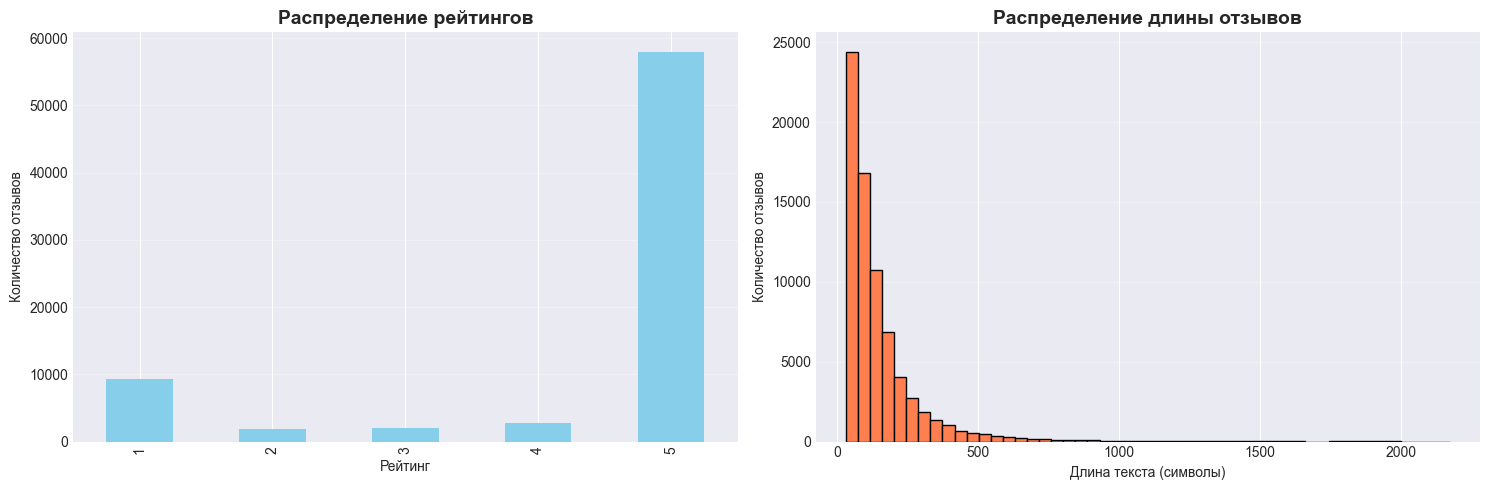

In [14]:
# Визуализация: Распределение рейтингов
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# График 1: Гистограмма рейтингов
reviews['rating'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Распределение рейтингов', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Рейтинг')
axes[0].set_ylabel('Количество отзывов')
axes[0].grid(axis='y', alpha=0.3)

# График 2: Распределение длины отзывов
reviews['text_length'].hist(bins=50, ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Распределение длины отзывов', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Длина текста (символы)')
axes[1].set_ylabel('Количество отзывов')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 🚫 Проверка на проблемы в данных

In [15]:
# Проверка пропущенных значений
print("=" * 80)
print("ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ")
print("=" * 80)

missing = reviews.isnull().sum()
missing_pct = (missing / len(reviews) * 100).round(2)

missing_df = pd.DataFrame({
    'Пропущено': missing,
    'Процент': missing_pct
})

print(missing_df[missing_df['Пропущено'] > 0])

ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ
        Пропущено  Процент
author          2      0.0


In [18]:
# Проверка на дубликаты
print("=" * 80)
print("ПРОВЕРКА НА ДУБЛИКАТЫ")
print("=" * 80)

# Полные дубликаты
duplicates_full = reviews.duplicated().sum()
print(f"\nПолных дубликатов: {duplicates_full:,}")

# Дубликаты по тексту
duplicates_text = reviews['text'].duplicated().sum()
print(f"Дубликатов по тексту: {duplicates_text:,}")

# Дубликаты по place_id + author (один автор - один отзыв на заведение)
if 'author' in reviews.columns:
    duplicates_author_place = reviews.duplicated(subset=['place_name', 'author']).sum()
    print(f"Дубликатов автор+заведение: {duplicates_author_place:,}")

ПРОВЕРКА НА ДУБЛИКАТЫ

Полных дубликатов: 16
Дубликатов по тексту: 7,478
Дубликатов автор+заведение: 8,765


In [19]:
# Проверка на аномалии
print("=" * 80)
print("АНОМАЛИИ")
print("=" * 80)

# Слишком короткие отзывы
too_short = (reviews['text_length'] < 10).sum()
print(f"\nСлишком короткие отзывы (< 10 символов): {too_short:,} ({too_short/len(reviews)*100:.2f}%)")

# Слишком длинные отзывы (возможно спам)
too_long = (reviews['text_length'] > 2000).sum()
print(f"Слишком длинные отзывы (> 2000 символов): {too_long:,} ({too_long/len(reviews)*100:.2f}%)")

# Пустые отзывы
empty = reviews['text'].fillna('').str.strip().str.len() == 0
print(f"Пустые отзывы: {empty.sum():,} ({empty.sum()/len(reviews)*100:.2f}%)")

# Отзывы только из спецсимволов/цифр
only_special = reviews['text'].fillna('').str.match(r'^[^а-яА-ЯёЁa-zA-Z]+$')
print(f"Только спецсимволы/цифры: {only_special.sum():,}")

АНОМАЛИИ

Слишком короткие отзывы (< 10 символов): 0 (0.00%)
Слишком длинные отзывы (> 2000 символов): 3 (0.00%)
Пустые отзывы: 0 (0.00%)
Только спецсимволы/цифры: 27


## 🧹 Чистка данных

In [20]:
# Создаем копию для чистки
reviews_clean = reviews.copy()

print(f"Исходное количество отзывов: {len(reviews_clean):,}")
print("\n🧹 Начинаем чистку...\n")

Исходное количество отзывов: 73,767

🧹 Начинаем чистку...



In [21]:
# Шаг 1: Удаление пропущенных значений в критичных колонках
initial_count = len(reviews_clean)

reviews_clean = reviews_clean.dropna(subset=['text', 'place_name'])

removed = initial_count - len(reviews_clean)
print(f"✅ Удалены строки с пропущенными критичными значениями: {removed:,}")
print(f"   Осталось: {len(reviews_clean):,}")

✅ Удалены строки с пропущенными критичными значениями: 0
   Осталось: 73,767


In [22]:
# Шаг 2: Заполнение пропусков в некритичных колонках
if 'rating' in reviews_clean.columns:
    # Заполняем рейтинг медианой
    median_rating = reviews_clean['rating'].median()
    reviews_clean['rating'].fillna(median_rating, inplace=True)
    print(f"✅ Заполнены пропуски в рейтинге медианой: {median_rating}")

if 'date' in reviews_clean.columns:
    # Для дат можно использовать forward fill или удалить
    reviews_clean['date'].fillna(method='ffill', inplace=True)
    print("✅ Заполнены пропуски в датах")

✅ Заполнены пропуски в рейтинге медианой: 5.0
✅ Заполнены пропуски в датах


In [23]:
# Шаг 3: Удаление полных дубликатов
initial_count = len(reviews_clean)

reviews_clean = reviews_clean.drop_duplicates()

removed = initial_count - len(reviews_clean)
print(f"✅ Удалены полные дубликаты: {removed:,}")
print(f"   Осталось: {len(reviews_clean):,}")

✅ Удалены полные дубликаты: 16
   Осталось: 73,751


In [24]:
# Шаг 4: Удаление дубликатов по тексту (сохраняем первое вхождение)
initial_count = len(reviews_clean)

reviews_clean = reviews_clean.drop_duplicates(subset=['text'], keep='first')

removed = initial_count - len(reviews_clean)
print(f"✅ Удалены дубликаты по тексту: {removed:,}")
print(f"   Осталось: {len(reviews_clean):,}")

✅ Удалены дубликаты по тексту: 7,462
   Осталось: 66,289


In [25]:
# Шаг 5: Фильтрация по длине текста
initial_count = len(reviews_clean)

# Удаляем слишком короткие (< 10 символов)
reviews_clean = reviews_clean[reviews_clean['text'].str.len() >= 10]

# Удаляем слишком длинные (> 5000 символов - вероятно спам)
reviews_clean = reviews_clean[reviews_clean['text'].str.len() <= 5000]

removed = initial_count - len(reviews_clean)
print(f"✅ Удалены отзывы с аномальной длиной: {removed:,}")
print(f"   Осталось: {len(reviews_clean):,}")

✅ Удалены отзывы с аномальной длиной: 0
   Осталось: 66,289


In [26]:
# Шаг 6: Удаление отзывов со спамом
initial_count = len(reviews_clean)

# Паттерны спама
spam_patterns = [
    r'(whatsapp|telegram|viber).*\d{10,}',  # Контакты
    r'http[s]?://',  # Ссылки
    r'www\.',  # Ссылки
    r'(купи|скидка|промокод|акция).*\d+%',  # Реклама
]

spam_mask = pd.Series(False, index=reviews_clean.index)

for pattern in spam_patterns:
    spam_mask |= reviews_clean['text'].str.contains(pattern, case=False, regex=True, na=False)

reviews_clean = reviews_clean[~spam_mask]

removed = initial_count - len(reviews_clean)
print(f"✅ Удалены отзывы со спамом: {removed:,}")
print(f"   Осталось: {len(reviews_clean):,}")

✅ Удалены отзывы со спамом: 39
   Осталось: 66,250


In [27]:
# Шаг 7: Базовая очистка текста
def clean_text(text):
    """
    Базовая очистка текста отзыва
    """
    if pd.isna(text):
        return ''
    
    # Приведение к строке
    text = str(text)
    
    # Удаление лишних пробелов
    text = ' '.join(text.split())
    
    # Удаление повторяющихся символов (более 3 подряд)
    text = re.sub(r'(.)\1{3,}', r'\1\1', text)
    
    # Замена множественных знаков препинания
    text = re.sub(r'[!]{2,}', '!', text)
    text = re.sub(r'[?]{2,}', '?', text)
    text = re.sub(r'[.]{2,}', '.', text)
    
    return text.strip()

print("🧹 Применяем базовую очистку текста...")
reviews_clean['review_text_clean'] = reviews_clean['text'].apply(clean_text)

# Обновляем длину после очистки
reviews_clean['text_length'] = reviews_clean['review_text_clean'].str.len()

print("✅ Текст очищен")

🧹 Применяем базовую очистку текста...
✅ Текст очищен


In [28]:
# Шаг 8: Определение языка (опционально)
# Простое определение: если в тексте есть кириллица, то русский/казахский
def detect_language(text):
    """
    Простое определение языка
    """
    if re.search('[а-яА-ЯёЁ]', text):
        return 'ru/kk'
    elif re.search('[a-zA-Z]', text):
        return 'en'
    else:
        return 'unknown'

reviews_clean['language'] = reviews_clean['review_text_clean'].apply(detect_language)

print("Распределение по языкам:")
print(reviews_clean['language'].value_counts())

Распределение по языкам:
language
ru/kk      66000
en           228
unknown       22
Name: count, dtype: int64


## 📊 Анализ после чистки

In [29]:
print("=" * 80)
print("ИТОГИ ЧИСТКИ")
print("=" * 80)

print(f"\nИсходное количество: {len(reviews):,}")
print(f"После чистки: {len(reviews_clean):,}")
print(f"Удалено: {len(reviews) - len(reviews_clean):,} ({(len(reviews) - len(reviews_clean))/len(reviews)*100:.2f}%)")

print("\nСтатистика после чистки:")
print(f"  Средняя длина отзыва: {reviews_clean['text_length'].mean():.0f} символов")
print(f"  Медианная длина: {reviews_clean['text_length'].median():.0f} символов")
print(f"  Уникальных заведений: {reviews_clean['place_name'].nunique():,}")

ИТОГИ ЧИСТКИ

Исходное количество: 73,767
После чистки: 66,250
Удалено: 7,517 (10.19%)

Статистика после чистки:
  Средняя длина отзыва: 150 символов
  Медианная длина: 102 символов
  Уникальных заведений: 81


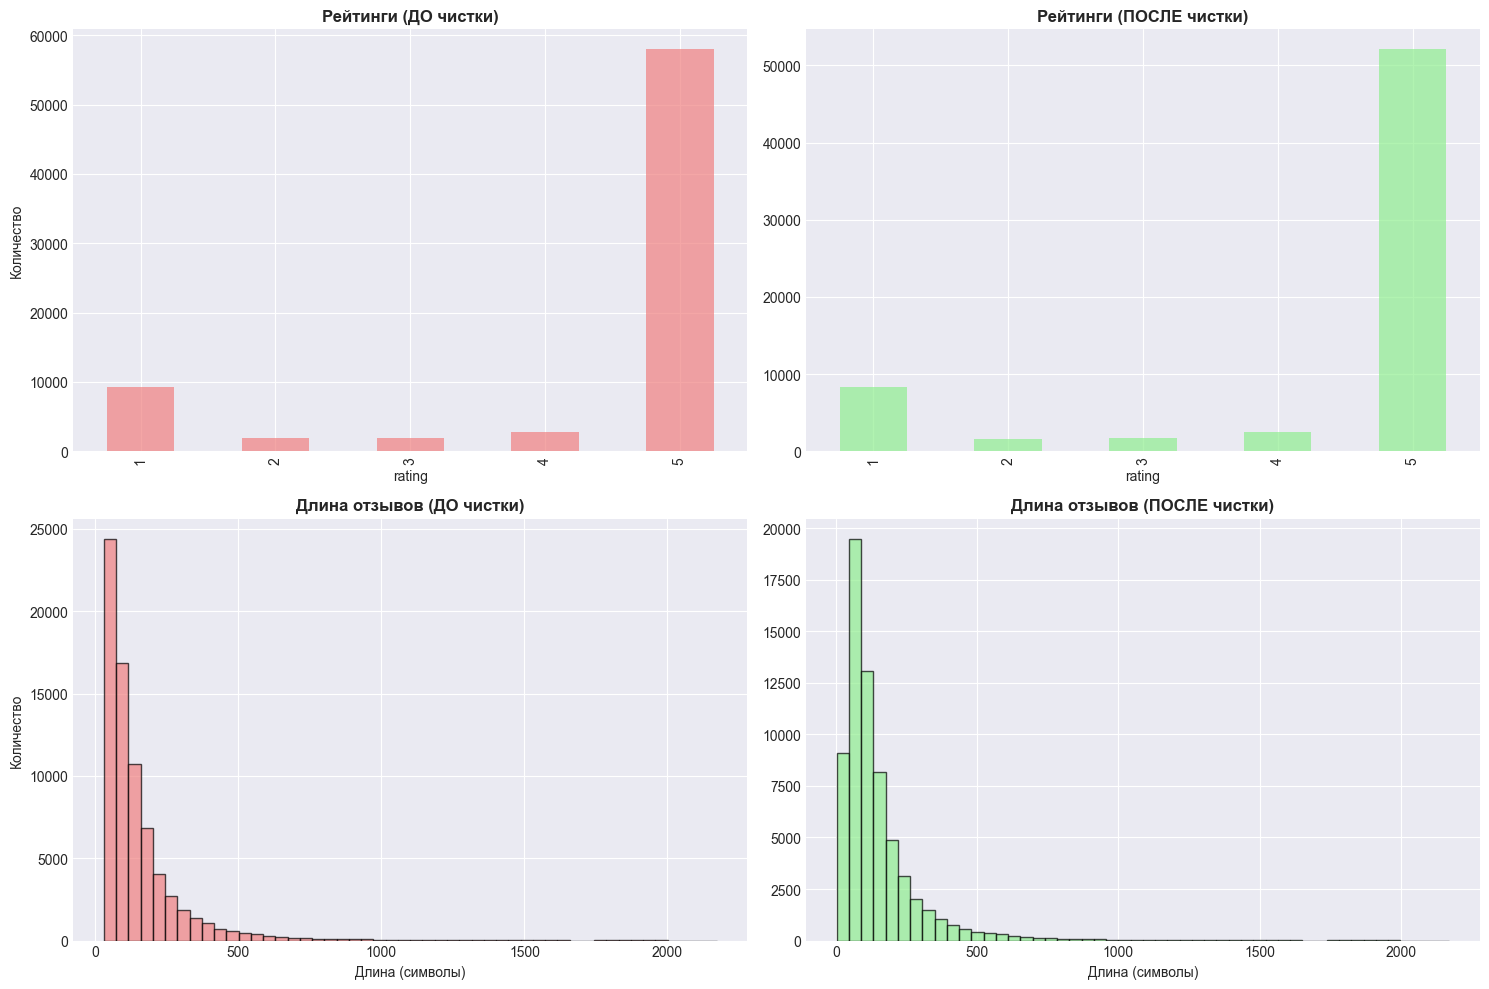

In [30]:
# Сравнение распределений до и после
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# До чистки - рейтинги
reviews['rating'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color='lightcoral', alpha=0.7)
axes[0, 0].set_title('Рейтинги (ДО чистки)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Количество')

# После чистки - рейтинги
reviews_clean['rating'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 1], color='lightgreen', alpha=0.7)
axes[0, 1].set_title('Рейтинги (ПОСЛЕ чистки)', fontsize=12, fontweight='bold')

# До чистки - длина
reviews['text_length'].hist(bins=50, ax=axes[1, 0], color='lightcoral', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Длина отзывов (ДО чистки)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Длина (символы)')
axes[1, 0].set_ylabel('Количество')

# После чистки - длина
reviews_clean['text_length'].hist(bins=50, ax=axes[1, 1], color='lightgreen', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Длина отзывов (ПОСЛЕ чистки)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Длина (символы)')

plt.tight_layout()
plt.show()

## 💾 Сохранение очищенных данных

In [ ]:
# Выбираем нужные колонки для сохранения
columns_to_save = ['place_id', 'review_text_clean', 'rating', 'text_length', 'language']

# Добавляем дополнительные колонки, если они есть
if 'date' in reviews_clean.columns:
    columns_to_save.append('date')
if 'author' in reviews_clean.columns:
    columns_to_save.append('author')

# Фильтруем только существующие колонки
columns_to_save = [col for col in columns_to_save if col in reviews_clean.columns]

# Сохраняем
output_file = 'reviews_cleaned.csv'
reviews_clean[columns_to_save].to_csv(output_file, index=False)

print(f"✅ Очищенные данные сохранены в '{output_file}'")
print(f"   Количество отзывов: {len(reviews_clean):,}")
print(f"   Количество колонок: {len(columns_to_save)}")

## 📈 Дополнительная статистика

In [32]:
# Топ заведений по количеству отзывов
print("=" * 80)
print("ТОП-20 ЗАВЕДЕНИЙ ПО КОЛИЧЕСТВУ ОТЗЫВОВ")
print("=" * 80)

top_places = reviews_clean['place_name'].value_counts().head(20)

if len(places) > 0:
    # Добавляем названия заведений
    top_places_df = pd.DataFrame({
        'place_id': top_places.index,
        'review_count': top_places.values
    })
    
    top_places_df = top_places_df.merge(
        places[[ 'name']],
        left_on='place_id',
        right_on='id',
        how='left'
    )
    
    print(top_places_df[['name', 'review_count']].to_string(index=False))
else:
    print(top_places)

ТОП-20 ЗАВЕДЕНИЙ ПО КОЛИЧЕСТВУ ОТЗЫВОВ


KeyError: 'id'

In [33]:
# Распределение отзывов по заведениям
reviews_per_place = reviews_clean.groupby('place_name').size()

print("\n=" * 80)
print("РАСПРЕДЕЛЕНИЕ ОТЗЫВОВ ПО ЗАВЕДЕНИЯМ")
print("=" * 80)
print(f"\nСреднее количество отзывов на заведение: {reviews_per_place.mean():.2f}")
print(f"Медиана: {reviews_per_place.median():.0f}")
print(f"\nЗаведений с 1 отзывом: {(reviews_per_place == 1).sum():,}")
print(f"Заведений с 2-5 отзывами: {((reviews_per_place >= 2) & (reviews_per_place <= 5)).sum():,}")
print(f"Заведений с 6-10 отзывами: {((reviews_per_place >= 6) & (reviews_per_place <= 10)).sum():,}")
print(f"Заведений с 10+ отзывами: {(reviews_per_place > 10).sum():,}")


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
РАСПРЕДЕЛЕНИЕ ОТЗЫВОВ ПО ЗАВЕДЕНИЯМ

Среднее количество отзывов на заведение: 817.90
Медиана: 423

Заведений с 1 отзывом: 1
Заведений с 2-5 отзывами: 0
Заведений с 6-10 отзывами: 1
Заведений с 10+ отзывами: 79


In [ ]:
# Визуализация распределения отзывов по заведениям
plt.figure(figsize=(12, 6))
reviews_per_place.hist(bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение количества отзывов по заведениям', fontsize=14, fontweight='bold')
plt.xlabel('Количество отзывов')
plt.ylabel('Количество заведений')
plt.axvline(reviews_per_place.mean(), color='red', linestyle='--', label=f'Среднее: {reviews_per_place.mean():.1f}')
plt.axvline(reviews_per_place.median(), color='green', linestyle='--', label=f'Медиана: {reviews_per_place.median():.0f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

## ✅ Резюме

Данные успешно очищены и готовы для NLP анализа!

**Следующие шаги:**
1. Использовать `reviews_cleaned.csv` для создания эмбеддингов
2. Запустить `02_semantic_search.ipynb` для семантического поиска
3. Применить продвинутые техники (ABSA, topic modeling)